In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_df = pd.read_csv('beijing_train.csv')
test_df = pd.read_csv('beijing_test.csv')

In [3]:
train_df.head()

,REF_NO,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


**Checking dtypes, data information and description:**

In [4]:
train_df.dtypes

REF_NO       int64
year         int64
month        int64
day          int64
hour         int64
PM2.5      float64
PM10       float64
SO2        float64
NO2        float64
CO         float64
O3         float64
TEMP       float64
PRES       float64
DEWP       float64
RAIN       float64
wd          object
WSPM       float64
station     object
dtype: object

In [5]:
train_df.describe()

,REF_NO,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,403776.000000,403776.000000,403776.000000,403776.000000,403776.000000,395301.000000,397554.000000,395000.000000,391917.000000,383515.000000,390769.000000,403512.000000,403511.000000,403507.000000,403515.000000,403538.000000
mean,16824.500000,2014.564194,6.735378,15.748217,11.500000,79.248275,104.327897,15.733060,50.352785,1214.843339,58.119327,14.088899,1010.282534,3.157291,0.067052,1.718380
std,9713.352953,1.097503,3.356479,8.808891,6.922195,79.146708,90.136400,21.739455,34.771910,1124.285676,57.375966,11.303534,10.356778,13.617273,0.837845,1.237965
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.400000,-43.400000,0.000000,0.000000
25%,8412.750000,2014.000000,4.000000,8.000000,5.750000,21.000000,36.000000,2.000000,23.000000,500.000000,11.000000,4.000000,1002.000000,-8.000000,0.000000,0.900000
50%,16824.500000,2015.000000,7.000000,16.000000,11.500000,55.000000,83.000000,7.000000,43.000000,900.000000,45.000000,15.400000,1009.800000,4.200000,0.000000,1.400000
75%,25236.250000,2016.000000,10.000000,23.000000,17.250000,110.000000,145.000000,19.000000,71.000000,1500.000000,83.000000,23.500000,1018.300000,15.500000,0.000000,2.200000
max,33648.000000,2016.000000,12.000000,31.000000,23.000000,999.000000,999.000000,500.000000,290.000000,10000.000000,1071.000000,41.600000,1042.800000,29.100000,72.500000,13.200000


**Checking and Imputing missing values:**

In [6]:
train_df.isna().sum()

REF_NO         0
year           0
month          0
day            0
hour           0
PM2.5       8475
PM10        6222
SO2         8776
NO2        11859
CO         20261
O3         13007
TEMP         264
PRES         265
DEWP         269
RAIN         261
wd          1389
WSPM         238
station        0
dtype: int64

In [7]:
train_df['PM2.5'] = train_df['PM2.5'].fillna(train_df['PM2.5'].mean())
train_df['PM10'] = train_df['PM10'].fillna(train_df['PM10'].mean())
train_df['SO2'] = train_df['SO2'].fillna(train_df['SO2'].mean())
train_df['NO2'] = train_df['NO2'].fillna(train_df['NO2'].mean())
train_df['CO'] = train_df['CO'].fillna(train_df['CO'].mean())
train_df['O3'] = train_df['O3'].fillna(train_df['O3'].mean())
train_df['TEMP'] = train_df['TEMP'].fillna(train_df['TEMP'].mean())
train_df['PRES'] = train_df['PRES'].fillna(train_df['PRES'].mean())
train_df['DEWP'] = train_df['DEWP'].fillna(train_df['DEWP'].mean())
train_df['RAIN'] = train_df['RAIN'].fillna(train_df['RAIN'].mean())
train_df['WSPM'] = train_df['WSPM'].fillna(train_df['WSPM'].mean())

In [8]:
train_df['wd'] = train_df['wd'].fillna(train_df['wd'].mode()[0]) #using mode for categorical variable

# EDA :

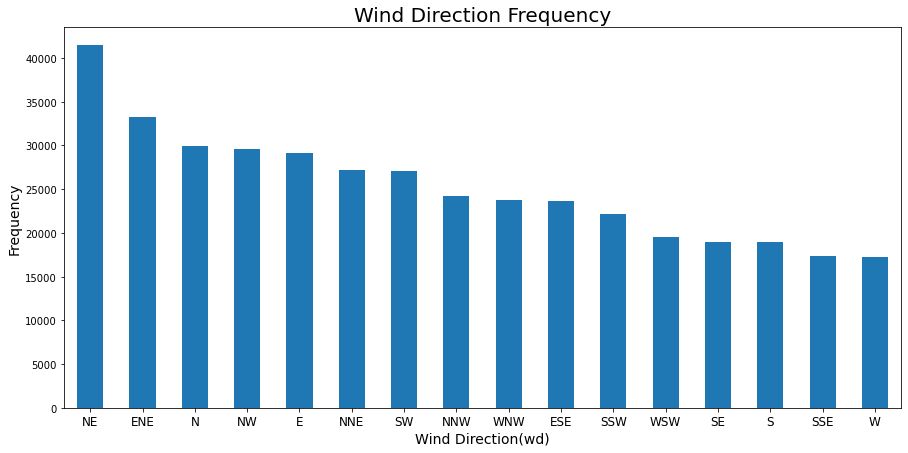

In [9]:
figure = plt.figure(figsize=[15, 7])
train_df['wd'].value_counts().plot.bar()
plt.xticks(rotation=0, size=12)
plt.xlabel(xlabel='Wind Direction(wd)', size=14)
plt.ylabel(ylabel='Frequency', size=14)
plt.title(label='Wind Direction Frequency', size=20)
plt.show()

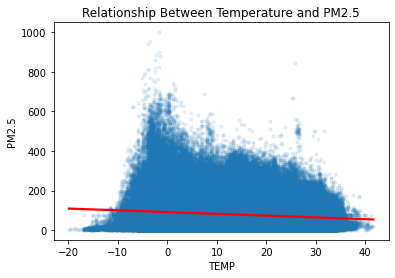

In [10]:
sns.regplot(x='TEMP', y='PM2.5', data= train_df, marker=".", scatter_kws={'alpha':0.1}, line_kws={'color':"r"})
plt.title('Relationship Between Temperature and PM2.5')
plt.show()

C:\Anaconda\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


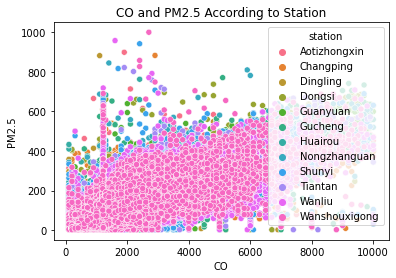

In [11]:
sns.scatterplot(x='CO', y='PM2.5', hue='station', data=train_df)
plt.title('CO and PM2.5 According to Station')
plt.show()

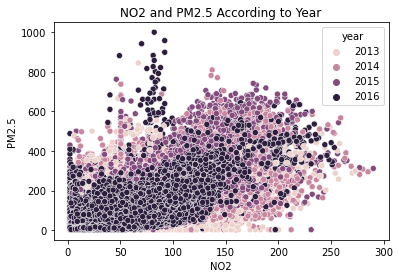

In [12]:
sns.scatterplot(x='NO2', y='PM2.5', hue='year', data= train_df)
plt.title('NO2 and PM2.5 According to Year')
plt.show()

C:\Anaconda\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


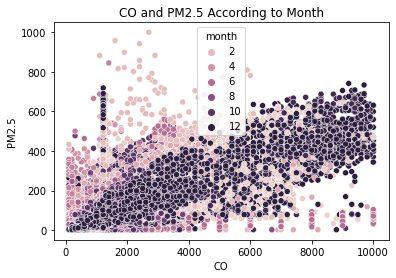

In [13]:
sns.scatterplot(x='CO', y='PM2.5', hue='month', data= train_df)
plt.title('CO and PM2.5 According to Month')
plt.show()

**Using LabelEncoder:**

In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
le = LabelEncoder()

In [16]:
train_df['wd'] = le.fit_transform(train_df['wd'])

In [17]:
train_df['station'] = le.fit_transform(train_df['station'])

In [18]:
train_df.dtypes

REF_NO       int64
year         int64
month        int64
day          int64
hour         int64
PM2.5      float64
PM10       float64
SO2        float64
NO2        float64
CO         float64
O3         float64
TEMP       float64
PRES       float64
DEWP       float64
RAIN       float64
wd           int32
WSPM       float64
station      int32
dtype: object

**Handling outliers:**

In [19]:
train_df.skew()

REF_NO      0.000000
year       -0.066413
month      -0.053269
day         0.005683
hour        0.000000
PM2.5       1.995338
PM10        1.830641
SO2         3.040966
NO2         1.068509
CO          2.627430
O3          1.662154
TEMP       -0.168753
PRES        0.151998
DEWP       -0.250106
RAIN       29.449764
wd          0.238510
WSPM        1.625749
station     0.000000
dtype: float64

In [20]:
train_df.head()

,REF_NO,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,6,4.4,0
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,3,4.7,0
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,6,5.6,0
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,7,3.1,0
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,3,2.0,0


REF_NO


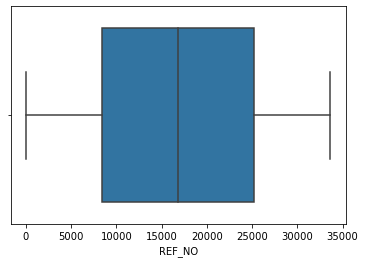

year


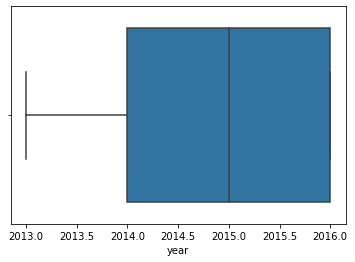

month


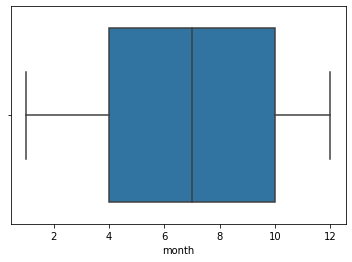

day


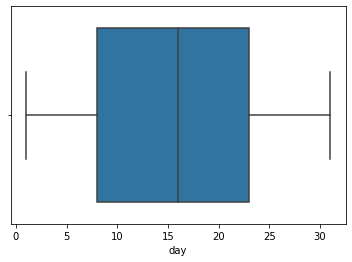

hour


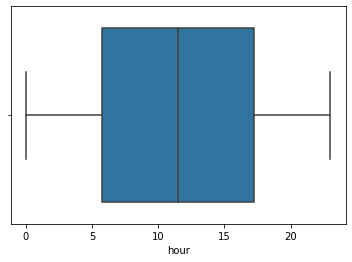

PM2.5


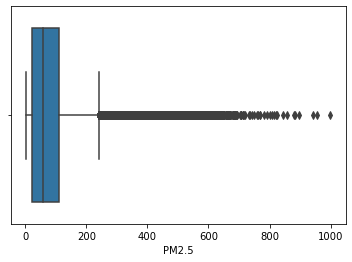

PM10


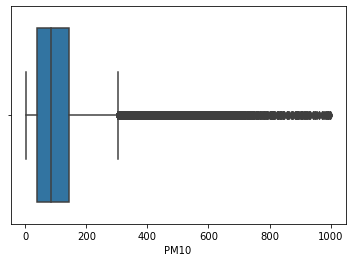

SO2


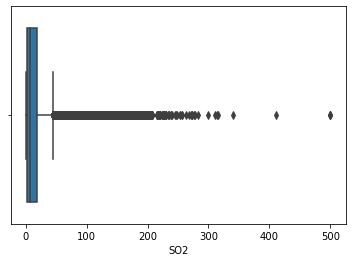

NO2


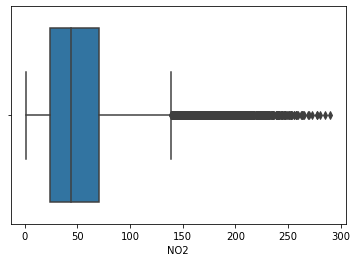

CO


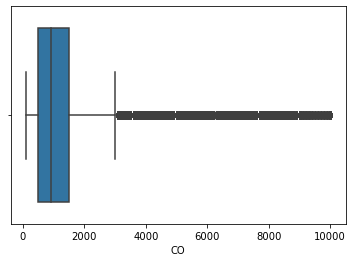

O3


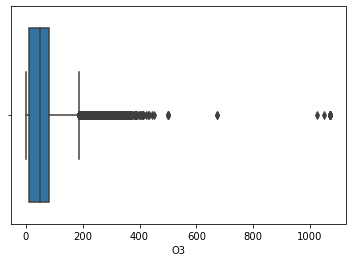

TEMP


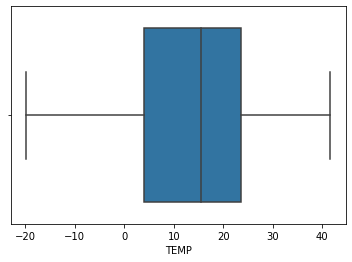

PRES


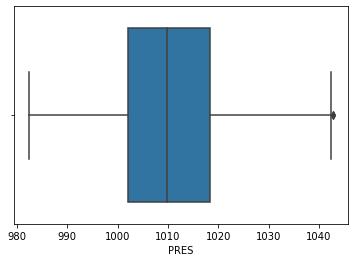

DEWP


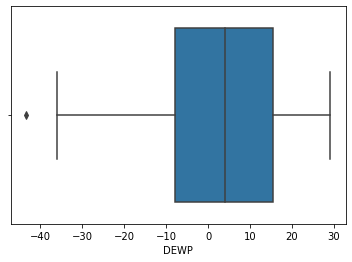

RAIN


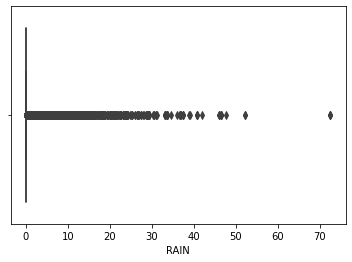

wd


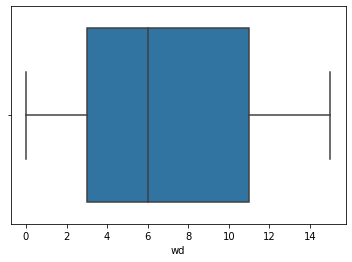

WSPM


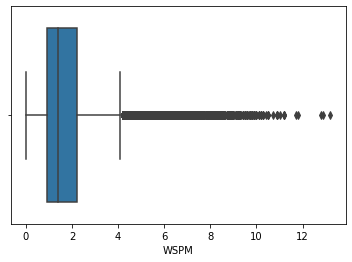

station


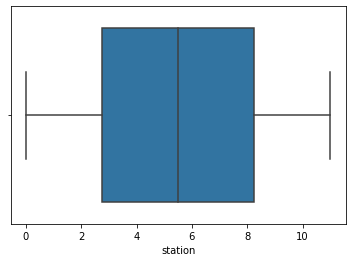

In [64]:
for col in train_df.columns:
    print(col)
    sns.boxplot(x = train_df[col], data = train_df)
    plt.show()

In [65]:
def Outlier(var):
    for x in var.columns:
        Q1 = var[x].quantile(0.25)
        Q3 = var[x].quantile(0.75)
        IQR = Q3-Q1
        Lower = Q1-(1.5*IQR)
        Upper = Q3+(1.5*IQR)
        var[x] = np.where(var[x].values > Upper, Upper, var[x].values)
        var[x] = np.where(var[x].values < Lower, Lower, var[x].values)
    return var
df_train = Outlier(train_df)

REF_NO


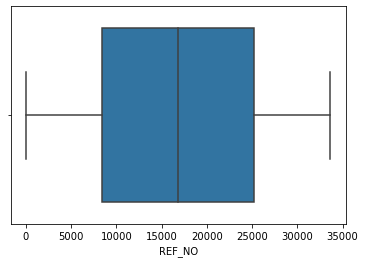

year


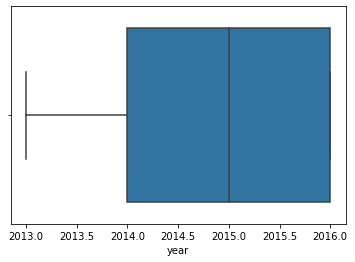

month


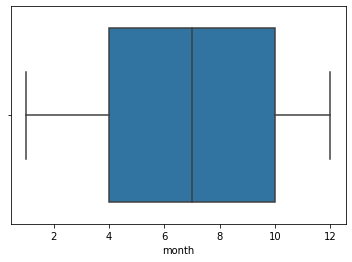

day


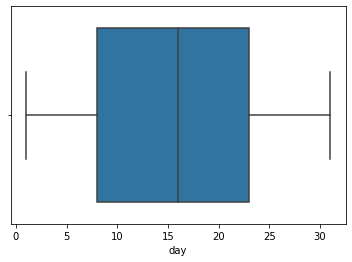

hour


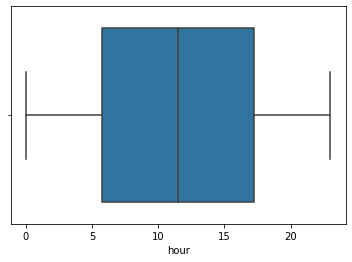

PM2.5


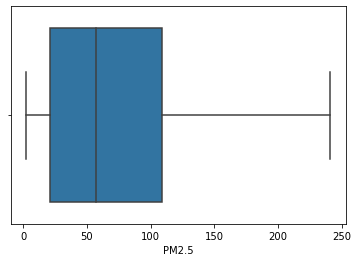

PM10


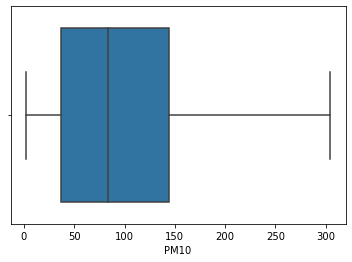

SO2


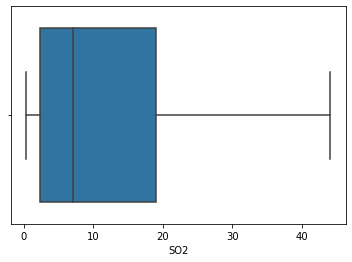

NO2


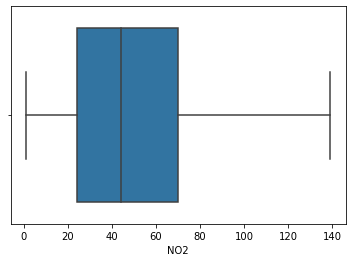

CO


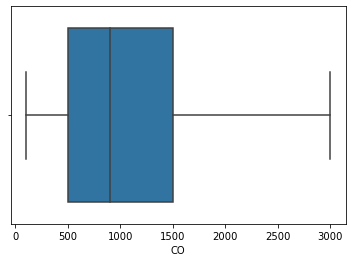

O3


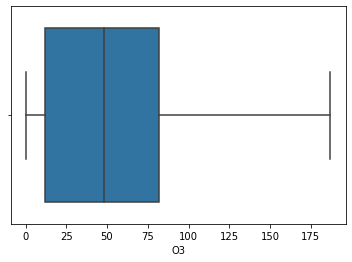

TEMP


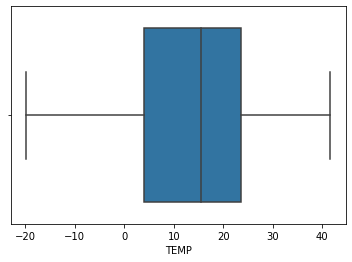

PRES


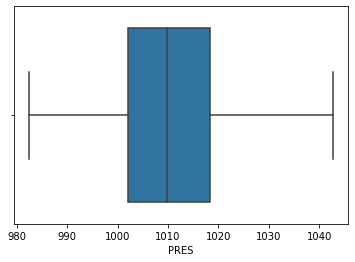

DEWP


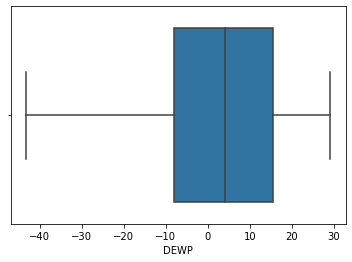

RAIN


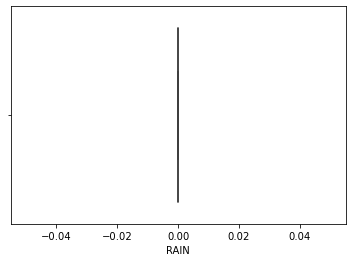

wd


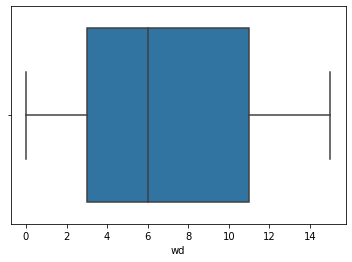

WSPM


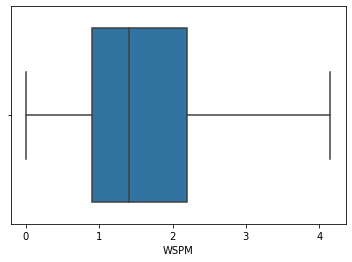

station


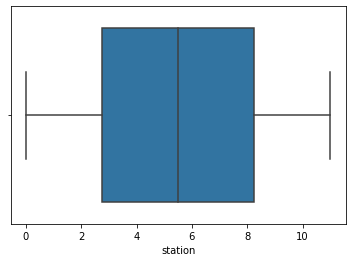

In [66]:
for col in df_train.columns:
    print(col)
    sns.boxplot(x = train_df[col], data = df_train)
    plt.show()

In [139]:
df_train.skew()

REF_NO     0.000000
year      -0.066413
month     -0.053269
day        0.005683
hour       0.000000
PM2.5      1.073214
PM10       0.955195
SO2        1.205915
NO2        0.799935
CO         1.042368
O3         1.012367
TEMP      -0.168753
PRES       0.151997
DEWP      -0.250105
RAIN       0.000000
wd         0.238510
WSPM       0.859636
station    0.000000
dtype: float64

**Train Test Split :**

In [140]:
feature_cols = ['year', 'month', 'day', 'hour', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM',
               'station']

In [141]:
x = df_train[feature_cols]
y = df_train['PM2.5']

In [142]:
from sklearn.model_selection import train_test_split

In [143]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 0)

In [144]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(323020, 16)
(80756, 16)
(323020,)
(80756,)


**Linear Regression**

In [145]:
from sklearn.linear_model import LinearRegression

In [146]:
model = LinearRegression()

In [147]:
model.fit(x_train, y_train)

LinearRegression()

In [148]:
#Predicting on train data
y_pred_train = model.predict(x_train)
y_pred_train

array([ 16.70983994, 160.60028099,  53.34700061, ...,  -8.89537741,
       -11.02383202,  33.1174328 ])

In [149]:
#Predicting on test data
y_pred_test = model.predict(x_test)
y_pred_test

array([ 28.2435089 , 152.68540589, 202.22667771, ...,   5.25783163,
        38.55640444, 231.226491  ])

**Importing required model evalution techniques:**

In [150]:
from sklearn import metrics

**MAE for Train and Test data:**

In [151]:
MAE_train = metrics.mean_absolute_error(y_train, y_pred_train)
MAE_test = metrics.mean_absolute_error(y_test, y_pred_test)

In [152]:
print('MAE for training set is {}'.format(MAE_train))
print('MAE for test set is {}'.format(MAE_test))

MAE for training set is 17.988951567777058
MAE for test set is 18.092626769964465


**MSE for Train and Test data:**

In [153]:
MSE_train = metrics.mean_squared_error(y_train, y_pred_train)
MSE_test = metrics.mean_squared_error(y_test, y_pred_test)

In [154]:
print('MSE for training set is {}'.format(MSE_train))
print('MSE for test set is {}'.format(MSE_test))

MSE for training set is 643.6970779608639
MSE for test set is 651.0063862449905


**RMSE for Train and Test data:**

In [155]:
RMSE_train = np.sqrt( metrics.mean_squared_error(y_train, y_pred_train))
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))

In [156]:
print('RMSE for training set is {}'.format(RMSE_train))
print('RMSE for test set is {}'.format(RMSE_test))

RMSE for training set is 25.371185978603048
RMSE for test set is 25.51482679237683


In [157]:
test_df.head()

,REF_NO,year,month,day,hour,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,33649,2017,1,1,0,496.0,8.0,121.0,6100.0,4.0,-4.7,1022.1,-6.1,0.0,ENE,1.0,Aotizhongxin
1,33650,2017,1,1,1,497.0,7.0,113.0,6300.0,4.0,-5.2,1022.3,-6.4,0.0,E,0.7,Aotizhongxin
2,33651,2017,1,1,2,469.0,7.0,111.0,6200.0,4.0,-5.4,1022.5,-6.5,0.0,ENE,1.1,Aotizhongxin
3,33652,2017,1,1,3,425.0,6.0,109.0,5900.0,3.0,-5.2,1022.5,-6.2,0.0,E,1.1,Aotizhongxin
4,33653,2017,1,1,4,468.0,10.0,123.0,7700.0,16.0,-5.0,1021.9,-5.8,0.0,ENE,1.0,Aotizhongxin


In [158]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16728 entries, 0 to 16727
Data columns (total 17 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   REF_NO   16728 non-null  int64  
 1   year     16728 non-null  int64  
 2   month    16728 non-null  int64  
 3   day      16728 non-null  int64  
 4   hour     16728 non-null  int64  
 5   PM10     16728 non-null  float64
 6   SO2      16728 non-null  float64
 7   NO2      16728 non-null  float64
 8   CO       16728 non-null  float64
 9   O3       16728 non-null  float64
 10  TEMP     16728 non-null  float64
 11  PRES     16728 non-null  float64
 12  DEWP     16728 non-null  float64
 13  RAIN     16728 non-null  float64
 14  wd       16728 non-null  object 
 15  WSPM     16728 non-null  float64
 16  station  16728 non-null  object 
dtypes: float64(10), int64(5), object(2)
memory usage: 2.2+ MB


In [159]:
test_df.isna().sum()

REF_NO     0
year       0
month      0
day        0
hour       0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

In [160]:
test_df.skew()

C:\Users\sidde\AppData\Local\Temp\ipykernel_9976\2591257319.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  test_df.skew()


REF_NO     0.016244
year       0.000000
month      0.125076
day        0.042312
hour       0.001134
PM10       2.253404
SO2        3.169759
NO2        0.845052
CO         1.955740
O3         0.852595
TEMP       0.566485
PRES      -0.419652
DEWP      -0.138297
RAIN      17.861775
WSPM       1.549774
dtype: float64

In [163]:
from sklearn.preprocessing import LabelEncoder

In [164]:
le = LabelEncoder()

In [165]:
test_df['wd'] = le.fit_transform(test_df['wd'])

In [166]:
test_df['station'] = le.fit_transform(test_df['station'])

In [167]:
test_df.dtypes

REF_NO     float64
year       float64
month      float64
day        float64
hour       float64
PM10       float64
SO2        float64
NO2        float64
CO         float64
O3         float64
TEMP       float64
PRES       float64
DEWP       float64
RAIN       float64
wd           int32
WSPM       float64
station      int32
dtype: object

REF_NO


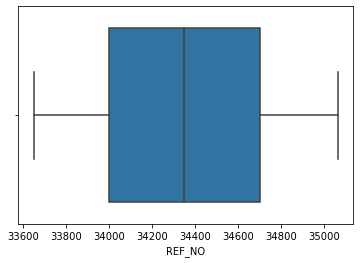

year


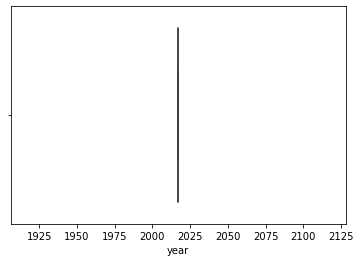

month


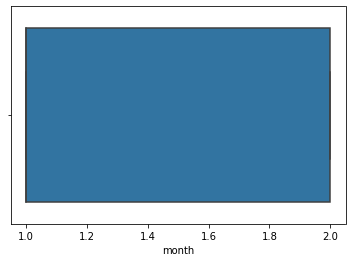

day


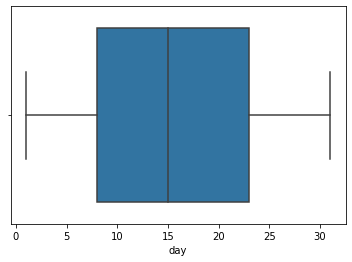

hour


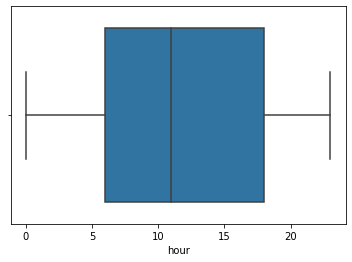

PM10


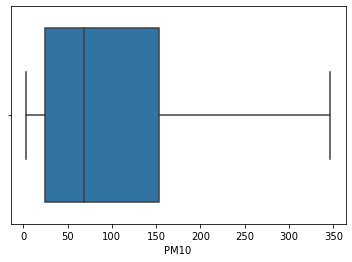

SO2


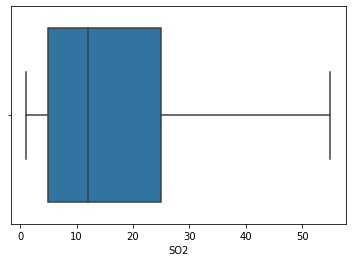

NO2


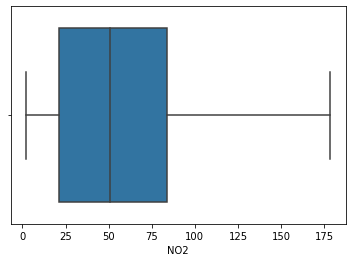

CO


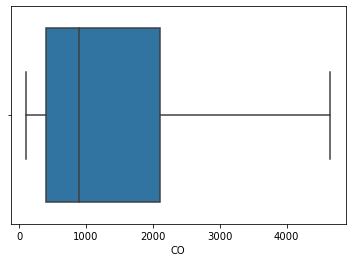

O3


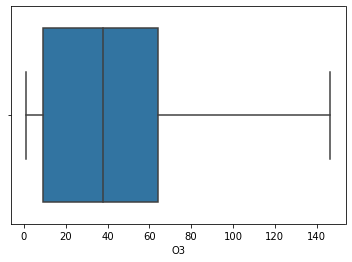

TEMP


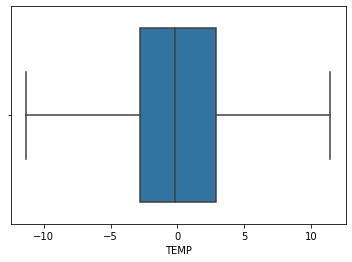

PRES


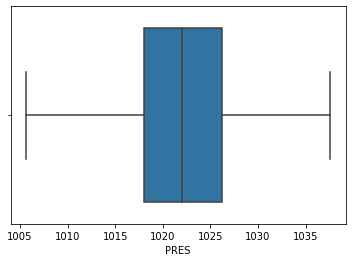

DEWP


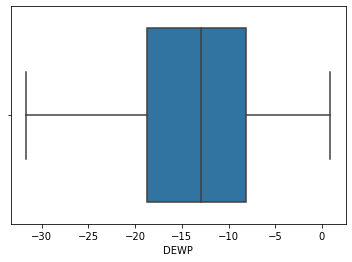

RAIN


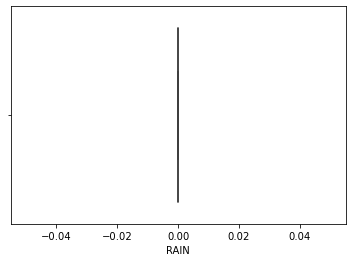

wd


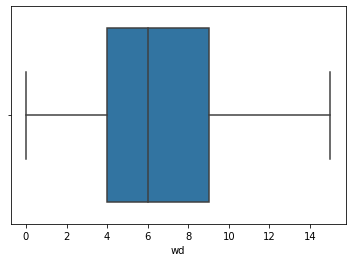

WSPM


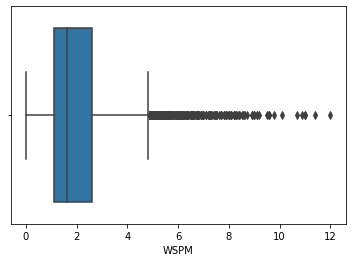

station


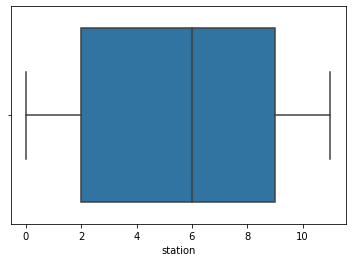

In [169]:
for col in test_df.columns:
    print(col)
    sns.boxplot(x = test_df[col], data = test_df)
    plt.show()

In [170]:
def Outlier(var):
    for x in var.columns:
        Q1 = var[x].quantile(0.25)
        Q3 = var[x].quantile(0.75)
        IQR = Q3-Q1
        Lower = Q1-(1.5*IQR)
        Upper = Q3+(1.5*IQR)
        var[x] = np.where(var[x].values > Upper, Upper, var[x].values)
        var[x] = np.where(var[x].values < Lower, Lower, var[x].values)
    return var
df_test= Outlier(test_df)

REF_NO


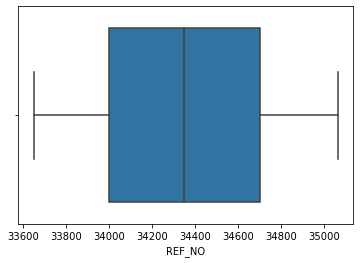

year


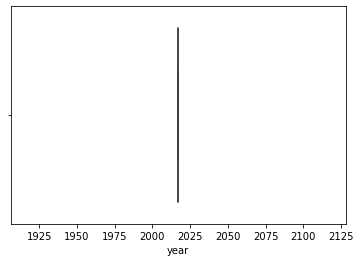

month


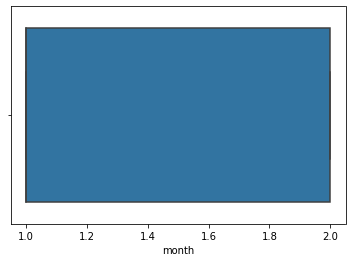

day


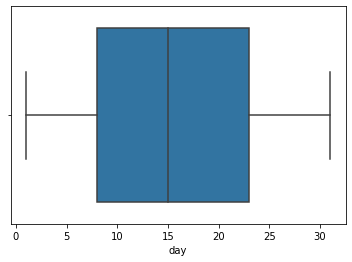

hour


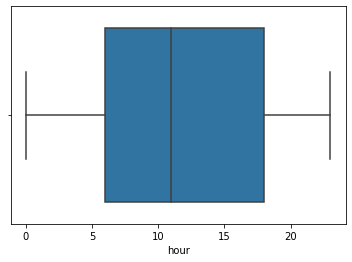

PM10


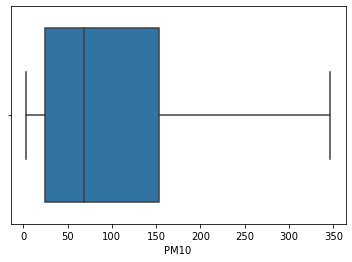

SO2


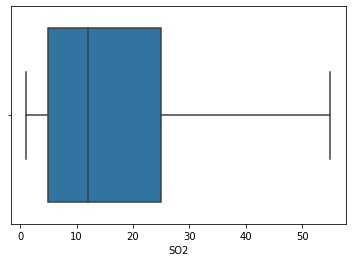

NO2


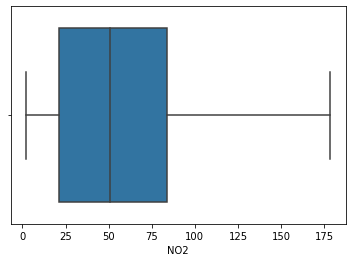

CO


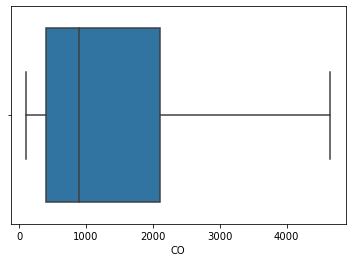

O3


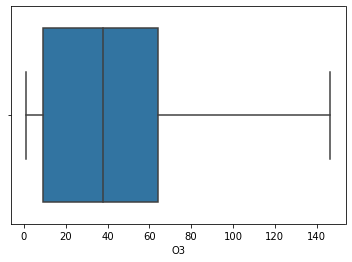

TEMP


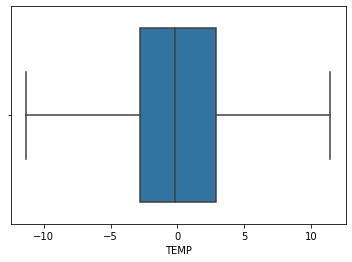

PRES


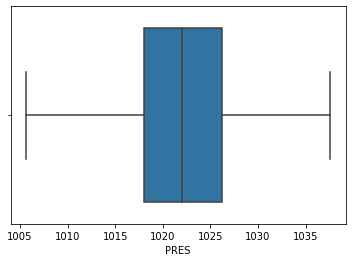

DEWP


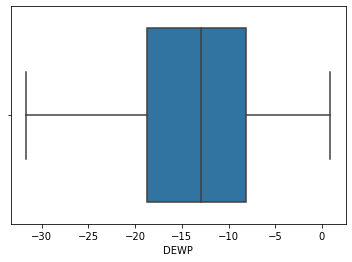

RAIN


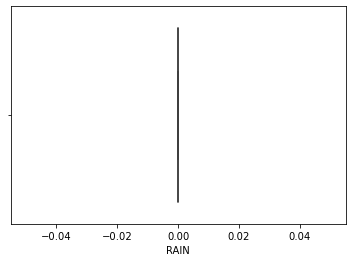

wd


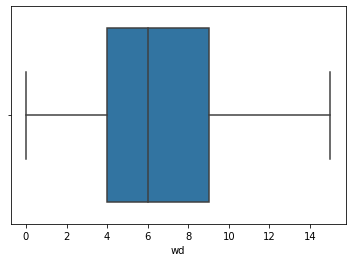

WSPM


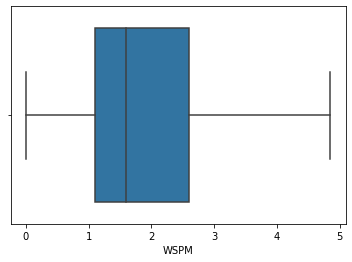

station


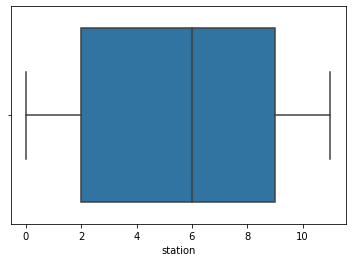

In [171]:
for col in test_df.columns:
    print(col)
    sns.boxplot(x = test_df[col], data = test_df)
    plt.show()

In [172]:
df_test.skew()

REF_NO     0.016244
year       0.000000
month      0.125076
day        0.042312
hour       0.001134
PM10       1.124126
SO2        1.145525
NO2        0.712117
CO         1.164930
O3         0.424018
TEMP       0.435622
PRES      -0.255576
DEWP      -0.138297
RAIN       0.000000
wd         0.457019
WSPM       0.920419
station   -0.001645
dtype: float64

In [173]:
df_test.head()

,REF_NO,year,month,day,hour,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,33649.0,2017.0,1.0,1.0,0.0,346.5,8.0,121.0,4650.0,4.0,-4.7,1022.1,-6.1,0.0,1.0,1.0,0.0
1,33650.0,2017.0,1.0,1.0,1.0,346.5,7.0,113.0,4650.0,4.0,-5.2,1022.3,-6.4,0.0,0.0,0.7,0.0
2,33651.0,2017.0,1.0,1.0,2.0,346.5,7.0,111.0,4650.0,4.0,-5.4,1022.5,-6.5,0.0,1.0,1.1,0.0
3,33652.0,2017.0,1.0,1.0,3.0,346.5,6.0,109.0,4650.0,3.0,-5.2,1022.5,-6.2,0.0,0.0,1.1,0.0
4,33653.0,2017.0,1.0,1.0,4.0,346.5,10.0,123.0,4650.0,16.0,-5.0,1021.9,-5.8,0.0,1.0,1.0,0.0


In [174]:
test_1 = df_test.iloc[:, 1:]

In [176]:
predicted_test = model.predict(test_1)

In [177]:
predicted_test

array([304.32826613, 304.2302497 , 304.41948612, ...,   0.88571418,
        -2.82420354,  -3.30055964])

In [178]:
df_test['PM10_New'] = predicted_test

In [179]:
df_test

,REF_NO,year,month,day,hour,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,PM10_New
0,33649.0,2017.0,1.0,1.0,0.0,346.5,8.0,121.0,4650.0,4.0,-4.70,1022.1,-6.1,0.0,1.0,1.0,0.0,304.328266
1,33650.0,2017.0,1.0,1.0,1.0,346.5,7.0,113.0,4650.0,4.0,-5.20,1022.3,-6.4,0.0,0.0,0.7,0.0,304.230250
2,33651.0,2017.0,1.0,1.0,2.0,346.5,7.0,111.0,4650.0,4.0,-5.40,1022.5,-6.5,0.0,1.0,1.1,0.0,304.419486
3,33652.0,2017.0,1.0,1.0,3.0,346.5,6.0,109.0,4650.0,3.0,-5.20,1022.5,-6.2,0.0,0.0,1.1,0.0,304.363063
4,33653.0,2017.0,1.0,1.0,4.0,346.5,10.0,123.0,4650.0,16.0,-5.00,1021.9,-5.8,0.0,1.0,1.0,0.0,305.843892
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16723,35060.0,2017.0,2.0,28.0,19.0,32.0,3.0,24.0,400.0,72.0,11.45,1013.5,-16.2,0.0,7.0,2.4,11.0,-1.450501
16724,35061.0,2017.0,2.0,28.0,20.0,32.0,3.0,41.0,500.0,50.0,11.45,1013.6,-15.1,0.0,14.0,0.9,11.0,-1.143265
16725,35062.0,2017.0,2.0,28.0,21.0,28.0,4.0,38.0,500.0,54.0,10.80,1014.2,-13.3,0.0,7.0,1.1,11.0,0.885714
16726,35063.0,2017.0,2.0,28.0,22.0,23.0,4.0,30.0,400.0,59.0,10.50,1014.4,-12.9,0.0,6.0,1.2,11.0,-2.824204


In [180]:
df_test.to_csv('Submission_beijing.csv', index = False, header = False)